<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/nice_shap_1_210826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 로드

- 변수 

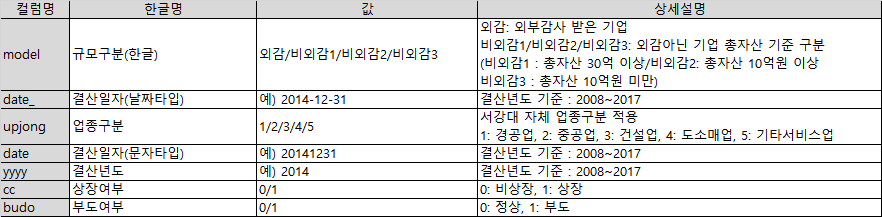

- 재무비율 변수

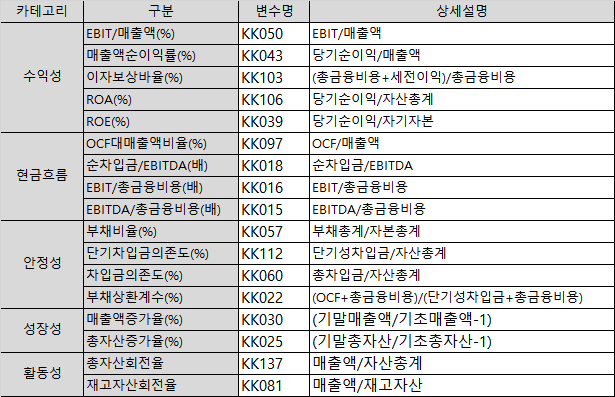

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#텐서플로우, 케라스 모두 2.4버전으로 해야 함
!pip uninstall tensorflow
!pip install tensorflow==2.4

In [ ]:
import tensorflow as tf  
print(tf.__version__)

In [ ]:
#기존 케라스 삭제
!pip uninstall q keras
!pip install q keras==2.4

In [ ]:
import keras
print(keras.__version__)

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_table('/content/drive/MyDrive/aseg_all.txt',sep='|', encoding='euc-kr')
df.head()

FileNotFoundError: ignored

In [87]:
data = df[['upjong','date','cc','seg','KK050','KK043','KK103','KK106','KK039','KK097','KK018','KK016','KK015','KK057','KK112','KK060','KK022','KK030','KK025','KK137','KK081','budo']]

In [88]:
columns = ['upjong','date','cc','seg','KK050','KK043','KK103','KK106','KK039','KK097','KK018','KK016','KK015','KK057','KK112','KK060','KK022','KK030','KK025','KK137','KK081','budo']

data.columns = columns

data.head()
data.tail()

,upjong,date,cc,seg,KK050,KK043,KK103,KK106,KK039,KK097,KK018,KK016,KK015,KK057,KK112,KK060,KK022,KK030,KK025,KK137,KK081,budo
1758771,4,20131231,0,4,5.915115,5.492274,1.000000e+11,23.820415,35.286649,0.0,5.913003,1.000000e+11,1.000000e+11,74.103464,0.0,0.0,1.000000e+11,25.298384,-0.515097,4.325878,10.243443,0
1758772,4,20141231,0,4,4.374730,4.374730,1.000000e+11,19.548573,30.158952,0.0,6.272501,1.000000e+11,1.000000e+11,78.878464,0.0,0.0,1.000000e+11,-19.740221,-22.101111,3.913379,13.979518,0
1758773,4,20151231,0,4,5.549458,5.549458,1.000000e+11,21.278436,49.286598,0.0,6.182687,1.000000e+11,1.000000e+11,85.831875,0.0,0.0,1.000000e+11,47.446512,71.834043,4.847574,37.728161,0
1758774,4,20161231,0,4,5.814087,5.814087,1.000000e+11,22.120777,41.633336,0.0,7.034444,1.000000e+11,1.000000e+11,55.780817,0.0,0.0,1.000000e+11,26.916054,27.904802,4.270534,182.988588,0
1758775,4,20171231,0,4,1.787513,1.787513,1.000000e+11,3.072373,3.258858,0.0,6.857062,1.000000e+11,1.000000e+11,11.862820,0.0,0.0,1.000000e+11,-70.754733,-35.263444,1.350873,52.779169,0


In [89]:
data.shape

(1758776, 22)

In [90]:
# 컬럼별 type 확인 및 결측치 확인
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758776 entries, 0 to 1758775
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   upjong  int64  
 1   date    int64  
 2   cc      int64  
 3   seg     int64  
 4   KK050   float64
 5   KK043   float64
 6   KK103   float64
 7   KK106   float64
 8   KK039   float64
 9   KK097   float64
 10  KK018   float64
 11  KK016   float64
 12  KK015   float64
 13  KK057   float64
 14  KK112   float64
 15  KK060   float64
 16  KK022   float64
 17  KK030   float64
 18  KK025   float64
 19  KK137   float64
 20  KK081   float64
 21  budo    int64  
dtypes: float64(17), int64(5)
memory usage: 295.2 MB


upjong        0
date          0
cc            0
seg           0
KK050     53967
KK043     53967
KK103     53967
KK106     53967
KK039     53967
KK097     53967
KK018     53967
KK016     53967
KK015     53967
KK057     53967
KK112     53967
KK060     53967
KK022     53967
KK030     53967
KK025     53967
KK137     53967
KK081     53967
budo          0
dtype: int64

In [91]:
data1 = data.dropna(axis=0) #결측값이 들어있는 행 전체 삭제

In [104]:
data_new = data1.reset_index()
data_n = data_new.drop("index", axis =1)

In [105]:
data_n

,upjong,date,cc,seg,KK050,KK043,KK103,KK106,KK039,KK097,KK018,KK016,KK015,KK057,KK112,KK060,KK022,KK030,KK025,KK137,KK081,budo
0,2,20081231,0,1,-59.421579,-195.568516,-1.073072e+00,-128.796967,-710.373600,-3.607583,-6.159087,-5.071702e+01,6.534647e+02,739.718487,65.608380,77.685408,-1.516643e+02,14.475540,-26.926723,0.556116,8.589601,0
1,2,20091231,1,1,-93.475448,-114.734601,-2.841701e+00,-28.523058,-81.019438,-96.347726,-66.929761,-3.148280e+02,-2.084375e+02,66.721241,28.801560,33.362461,-4.902212e+01,-56.900229,14.177353,0.265056,4.646342,0
2,1,20081231,0,1,0.475715,-2.112904,3.453815e-01,-2.190662,-7.854671,-4.961810,1.414136,5.462895e+01,1.120677e+02,145.186833,33.924983,38.031343,7.334830e+00,23.873020,64.051768,1.288301,4.617894,0
3,1,20091231,0,1,-3.186167,-6.293596,-6.147844e-01,-7.669151,-19.745587,-1.502189,-1.377936,-4.855521e+01,8.045743e+00,224.187905,45.217678,49.032063,-3.619759e+00,2.353001,-12.914119,1.134450,4.695370,0
4,1,20101231,0,1,-7.312422,-9.731166,-3.052731e+00,-13.490149,-50.396520,1.349333,-7.384765,-3.053140e+02,-2.318118e+02,399.427107,57.930300,61.742886,-1.235184e+01,4.710950,-7.957435,1.328841,8.673296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704804,4,20131231,0,4,5.915115,5.492274,1.000000e+11,23.820415,35.286649,0.000000,5.913003,1.000000e+11,1.000000e+11,74.103464,0.000000,0.000000,1.000000e+11,25.298384,-0.515097,4.325878,10.243443,0
1704805,4,20141231,0,4,4.374730,4.374730,1.000000e+11,19.548573,30.158952,0.000000,6.272501,1.000000e+11,1.000000e+11,78.878464,0.000000,0.000000,1.000000e+11,-19.740221,-22.101111,3.913379,13.979518,0
1704806,4,20151231,0,4,5.549458,5.549458,1.000000e+11,21.278436,49.286598,0.000000,6.182687,1.000000e+11,1.000000e+11,85.831875,0.000000,0.000000,1.000000e+11,47.446512,71.834043,4.847574,37.728161,0
1704807,4,20161231,0,4,5.814087,5.814087,1.000000e+11,22.120777,41.633336,0.000000,7.034444,1.000000e+11,1.000000e+11,55.780817,0.000000,0.000000,1.000000e+11,26.916054,27.904802,4.270534,182.988588,0


In [44]:
import missingno as msno

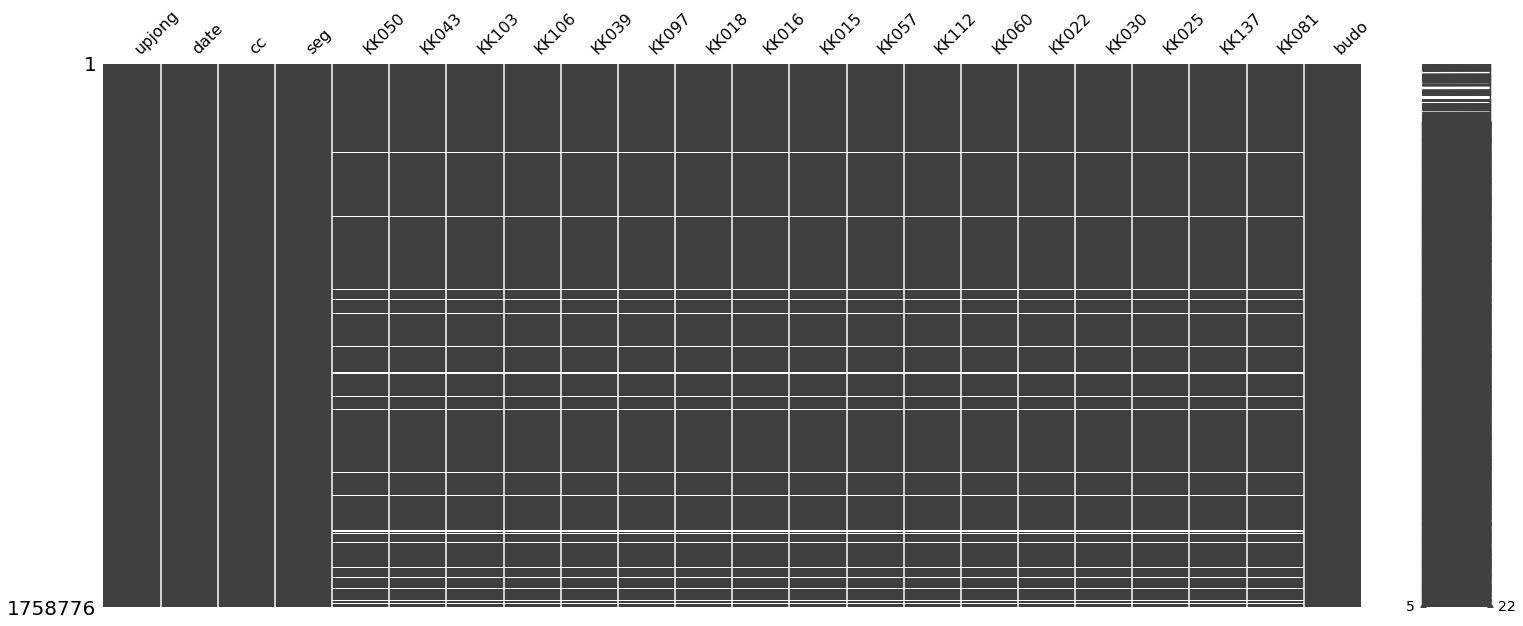

In [45]:
msno.matrix(data)

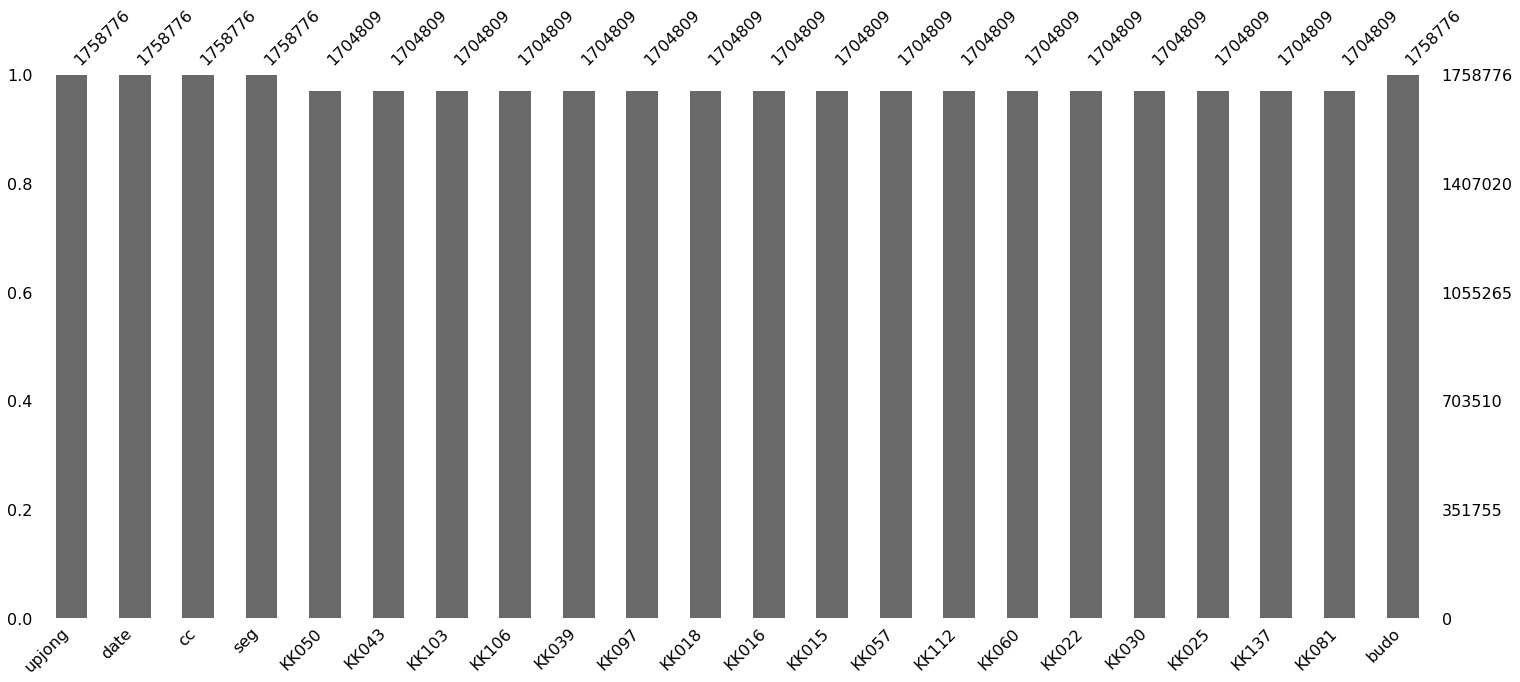

In [46]:
msno.bar(data)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

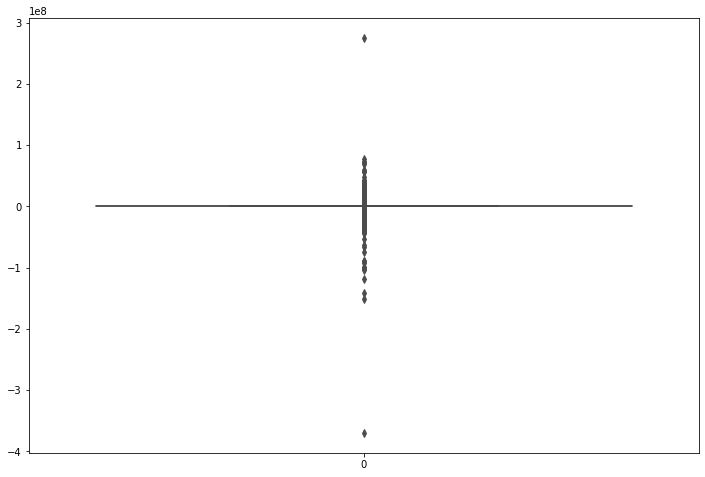

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data1['KK050'], color='yellow')
plt.show()

In [169]:
def outlier_iqr(data): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.percentile(data,[25, 75] )       
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    

    
    # 이상치 총 개수 구하기
    return  np.where((data > upper) | (data < lower))

In [ ]:
KK050_outlier_index=outlier_iqr(data_n['KK050'])[0]
KK043_outlier_index=outlier_iqr(data_n['KK043'])[0]
KK103_outlier_index=outlier_iqr(data_n['KK103'])[0]
KK039_outlier_index=outlier_iqr(data_n['KK039'])[0]
KK097_outlier_index=outlier_iqr(data_n['KK097'])[0]
KK018_outlier_index=outlier_iqr(data_n['KK018'])[0]
KK016_outlier_index=outlier_iqr(data_n['KK016'])[0]
KK015_outlier_index=outlier_iqr(data_n['KK015'])[0]
KK057_outlier_index=outlier_iqr(data_n['KK057'])[0]
KK112_outlier_index=outlier_iqr(data_n['KK112'])[0]
KK060_outlier_index=outlier_iqr(data_n['KK060'])[0]
KK022_outlier_index=outlier_iqr(data_n['KK022'])[0]
KK030_outlier_index=outlier_iqr(data_n['KK030'])[0]
KK025_outlier_index=outlier_iqr(data_n['KK025'])[0]
KK137_outlier_index=outlier_iqr(data_n['KK137'])[0]
KK081_outlier_index=outlier_iqr(data_n['KK081'])[0]

In [ ]:
data_n.loc[KK050_outlier_index,'KK050']
data_n.loc[KK043_outlier_index,'KK043']
data_n.loc[KK103_outlier_index,'KK103']
data_n.loc[KK039_outlier_index,'KK039']
data_n.loc[KK097_outlier_index,'KK097']
data_n.loc[KK018_outlier_index,'KK018']
data_n.loc[KK016_outlier_index,'KK016']
data_n.loc[KK015_outlier_index,'KK015']
data_n.loc[KK057_outlier_index,'KK057']
data_n.loc[KK112_outlier_index,'KK112']
data_n.loc[KK060_outlier_index,'KK060']
data_n.loc[KK022_outlier_index,'KK022']
data_n.loc[KK030_outlier_index,'KK030']
data_n.loc[KK025_outlier_index,'KK025']
data_n.loc[KK137_outlier_index,'KK137']
data_n.loc[KK081_outlier_index,'KK081']

In [184]:
lead_outlier_index = np.concatenate((KK050_outlier_index,KK043_outlier_index,KK103_outlier_index,KK039_outlier_index,KK097_outlier_index,KK018_outlier_index,KK016_outlier_index,
                                     KK015_outlier_index, KK057_outlier_index, KK112_outlier_index, KK060_outlier_index,KK022_outlier_index,
                                     KK030_outlier_index,KK025_outlier_index,KK137_outlier_index,KK081_outlier_index ), axis = None)
print(len(lead_outlier_index))
lead_outlier_index

3839434


array([      0,       1,      16, ..., 1704754, 1704768, 1704800])

In [186]:
lead_not_outlier_index = []

for i in data_n.index :

  if i not in lead_outlier_index :
    lead_not_outlier_index.append(i)

In [187]:
data_clean = data_n.loc[lead_not_outlier_index]
data_clean = data_clean.reset_index(drop=True)
data_clean

,upjong,date,cc,seg,KK050,KK043,KK103,KK106,KK039,KK097,KK018,KK016,KK015,KK057,KK112,KK060,KK022,KK030,KK025,KK137,KK081,budo
0,1,20081231,0,1,6.718424,5.628003,14.162227,13.189144,24.085257,0.0,9.693799,1579.563950,1579.563950,63.412437,0.000000,14.526426,1195.069549,117.801467,4.506815,2.395130,10.132431,0
1,5,20080229,0,1,4.629015,3.683619,3.985425,3.728446,8.311009,0.0,3.762416,397.972301,397.972301,113.938543,0.000000,18.549890,493.949201,6.985909,5.701376,1.040223,97.655448,0
2,5,20090228,0,1,3.225161,2.305291,2.317573,2.160604,5.037027,0.0,2.112441,229.645707,229.645707,127.057994,0.000000,16.028884,350.610602,3.676304,11.965261,0.990143,93.439134,0
3,5,20100228,0,1,5.018538,4.212771,4.153098,3.237216,9.007614,0.0,3.316254,411.565118,411.565118,164.726845,0.000000,12.273183,622.827833,5.884124,29.144633,0.866165,96.193901,0
4,5,20110228,0,1,-1.693596,-4.294118,-1.452255,-3.801192,-13.035269,0.0,-3.978551,-152.990469,-152.990469,387.467802,0.000000,14.452590,-65.125218,15.097620,-0.086464,0.884826,98.997150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533103,4,20161231,0,4,6.568099,6.170929,16.084409,21.368381,35.089110,0.0,6.739930,1696.987752,1696.987752,54.433094,0.000000,34.143521,1742.270771,-7.296874,4.311880,3.535829,8.157951,0
533104,2,20141231,0,4,4.924566,3.987091,5.257425,8.172736,11.812304,0.0,13.871195,1479.632104,1479.632104,233.363177,0.000000,59.242759,1479.190217,77.172108,-17.291915,1.855802,12.203653,0
533105,2,20161231,0,4,4.103731,3.181179,4.684862,3.714485,18.144260,0.0,14.074434,1525.598279,1525.598279,284.620441,0.000000,65.171488,1501.936004,-42.994452,-11.614624,1.095655,7.068144,0
533106,1,20141231,0,4,6.584183,6.032102,7.155637,15.231978,19.992888,0.0,16.006556,2899.313118,2899.313118,41.231673,29.194353,29.194353,153.879926,-15.381930,-9.716877,2.396205,158.728914,0


In [ ]:
#https://hungryap.tistory.com/69

Calculation of IV  metrics(WOE)

In [194]:
data_clean.groupby(['upjong'])['budo'].agg(['count','sum']).head()

,count,sum
upjong,,
1,78523,1051
2,177621,1552
3,105074,864
4,125047,1159
5,46843,733


In [207]:
def IV_calc(data,var):
    if data[var].dtypes == "int64":
        dataf = data.groupby([var])['budo'].agg(['count','sum'])
        dataf.columns = ["Total","bad"]    
        dataf["good"] = dataf["Total"] - dataf["bad"]
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["good_per"] = dataf["good"]/dataf["good"].sum()
        dataf["WOE"] = np.log(dataf["good_per"]/dataf["bad_per"])
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"])                      
        return dataf
    else:
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
        dataf = data.groupby(['bin_var'])['budo'].agg(['count','sum'])
        dataf.columns = ["Total","bad"]    
        dataf["good"] = dataf["Total"] - dataf["bad"]
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["good_per"] = dataf["good"]/dataf["good"].sum()
        dataf["WOE"] = np.log(dataf["good_per"]/dataf["bad_per"])
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"])
        return dataf

In [208]:
print ("\n\nCredit History - Information Value(WOE)\n")
print (IV_calc(data_clean,'upjong'))



Credit History - Information Value(WOE)

         Total   bad    good   bad_per  good_per       WOE       I_V
upjong                                                              
1        78523  1051   77472  0.196119  0.146797 -0.289669  0.014287
2       177621  1552  176069  0.289606  0.333623  0.141488  0.006228
3       105074   864  104210  0.161224  0.197461  0.202747  0.007347
4       125047  1159  123888  0.216272  0.234748  0.081977  0.001515
5        46843   733   46110  0.136779  0.087371 -0.448204  0.022145


In [226]:
# List of IV values
Iv_list = []
for col in data_clean.columns:
    assigned_data = IV_calc(data = data_clean,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3)
    dt_type = data_clean[col].dtypes
    Iv_list.append((iv_val,col,dt_type))

Iv_list = sorted(Iv_list,reverse = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [227]:
for i in range(len(Iv_list)):
    print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])

inf , date ,type = int64
inf , budo ,type = int64
5.752 , cc ,type = int64
0.333 , KK016 ,type = float64
0.333 , KK015 ,type = float64
0.3 , KK103 ,type = float64
0.299 , bin_var ,type = category
0.299 , KK081 ,type = float64
0.191 , KK057 ,type = float64
0.189 , KK022 ,type = float64
0.176 , KK106 ,type = float64
0.148 , KK097 ,type = float64
0.134 , KK137 ,type = float64
0.109 , KK060 ,type = float64
0.095 , KK112 ,type = float64
0.086 , KK043 ,type = float64
0.068 , KK039 ,type = float64
0.063 , KK030 ,type = float64
0.052 , upjong ,type = int64
0.04 , KK018 ,type = float64
0.028 , seg ,type = int64
0.027 , KK050 ,type = float64
0.013 , KK025 ,type = float64


Converting nominal variables to numeric using get_dummies()

In [220]:
dummy_upjong = pd.get_dummies(data_clean['upjong'], prefix='upjong')
dummy_cc = pd.get_dummies(data_clean['cc'], prefix='cc')
dummy_seg = pd.get_dummies(data_clean['seg'], prefix='seg')

In [232]:
continuous_columns = ['KK050','KK043','KK103','KK106','KK039','KK097','KK018','KK016','KK015','KK057','KK112','KK060','KK022','KK030','KK025','KK137','KK081']
type(continuous_columns)

list

In [228]:
budo_columns = ['budo']
type(budo_columns)

list

In [236]:
continuous_columns = data_clean.select_dtypes(include=['float64']).columns.values.tolist()
#continuous_columns.remove('budo')
credit_columns = data_clean[continuous_columns]
credit_data_new = pd.concat([dummy_upjong,dummy_cc,dummy_seg,credit_columns,data_clean['budo']],axis=1)

In [ ]:
credit_data_new.head()

In [ ]:
### Sandardization of data ###
#if you are using KNN or Neural Networks, then this step becomes necessary.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(credit_data_new.drop(['budo'],axis=1))

# Generating the standardized values of x
x=PredictorScalerFit.transform(credit_data_new.drop(['budo'],axis=1))

# Split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, credit_data_new['budo'], test_size=0.3, random_state=42)


In [2]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

NameError: ignored